In [1]:
from sklearn.decomposition import KernelPCA
from sklearn.cross_validation import KFold
from sklearn import svm
import numpy as np
import random
import math
from sklearn.metrics import confusion_matrix as CM

##Different Kernels

In [2]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits

In [3]:
def IndOfSortedFea(feaInfo):
    """return sorted index of a list"""
    sortInfo=sorted(feaInfo,reverse=True)
    ##for test
    ##print sortInfo
    return [feaInfo.index(i) for i in sortInfo]
a=[3,4,6,2]
print IndOfSortedFea(a)

[2, 1, 0, 3]


In [4]:
def corDis(x,y):
    """
    calculate the correlation distance, given x and y calculate how similar the x and y is.
    return a value, 0 means x and y are independent, higher mean x are determinstic of y.
    """
    assert len(x)==len(y)
    n=len(x)
    a=np.zeros((n,n))
    b=np.zeros((n,n))
    ##calculate pair wise distance
    for i in xrange(n):
        for j in xrange(n):
            a[i,j]=np.linalg.norm(x[i]-x[j])
            b[i,j]=np.linalg.norm(y[i]-y[j])
    aRowMean=np.mean(a,axis=1)
    aColMean=np.mean(a,axis=0)
    bRowMean=np.mean(b,axis=1)
    bColMean=np.mean(b,axis=0)
    aMean=np.mean(a)
    bMean=np.mean(b)
    A=np.zeros((n,n))
    B=np.zeros((n,n))
    ##normalization
    for i in xrange(n):
        for j in xrange(n):
            A[i,j]=a[i,j]-aRowMean[i]-aColMean[j]+aMean
            B[i,j]=b[i,j]-bRowMean[i]-bColMean[j]+bMean
    cordis=0.
    for i in xrange(n):
        for j in xrange(n):
            cordis += A[i,j]*B[i,j]
    return cordis*(1./n**2)

In [5]:
#%matplotlib inline
from matplotlib import pyplot as plt
def plotFunction(x,y,text):
    n=x.shape[1]
    cols=2
    rows=int(math.ceil(n/2.))
    fig,ax=plt.subplots(ncols=cols,nrows=rows)
    if rows==1:
        for j in range(cols):
            if j<n:
                ax[j].scatter(x[:,j],y,c='b')
    else:
        for i in range(rows):
            for j in range(cols):
                if i*cols+j<n:
                    ax[i,j].scatter(x[:,i*cols+j],y,c='b')
                    #ax[i].title('x%d'%i,fontsize='small')
    plt.title(text)
    plt.show()

#print int(math.ceil(result1.shape[1]/2.))
#plotFunction(result1,y,"first layer")

In [6]:
def crossValidation(x,y):
    """
    version 2
    according to the true y, predict
    greedy algorithm: first using index
    return
    """
    crossErrors=[]
    confusion_matrix=[]
    #svc=svm.LinearSVC()
    svc=svm.SVC(kernel='linear')
    kf = KFold(x.shape[0], n_folds=5,shuffle=True)
    for train,test in kf:
        svc.fit(x[train],y[train])
        prediction=svc.predict(x[test])
        crossErrors.append(((prediction!=y[test]).sum())/float(len(y[test])))
        confusion_matrix.append(CM(y[test],prediction))
    return np.mean(crossErrors),confusion_matrix

In [7]:
def layer(x,y):
    """version 2"""
    kpca=KernelPCA(kernel='rbf',gamma=1.,n_components=x.shape[1])
    xT=kpca.fit_transform(x)
    rank=[]
    numOfFeatures=xT.shape[1]
    for i in xrange(numOfFeatures):
        rank.append(corDis(xT[:,i],y))
    feaSelected=IndOfSortedFea(rank)
    
    featureSelectedErrors=[]
    for i in xrange(numOfFeatures):
        crossErrors,cms=crossValidation(xT[:,feaSelected[:i+1]],y)
        featureSelectedErrors.append(crossErrors)
    choice=featureSelectedErrors.index(min(featureSelectedErrors))
    return xT[:,feaSelected[:choice+1]],featureSelectedErrors,cms

In [8]:
def layer_poly(x,y):
    """ploy kernel"""
    kpca=KernelPCA(kernel='poly',n_components=x.shape[1])
    xT=kpca.fit_transform(x)
    rank=[]
    numOfFeatures=xT.shape[1]
    for i in xrange(numOfFeatures):
        rank.append(corDis(xT[:,i],y))
    feaSelected=IndOfSortedFea(rank)
    
    featureSelectedErrors=[]
    for i in xrange(numOfFeatures):
        crossErrors,cms=crossValidation(xT[:,feaSelected[:i+1]],y)
        featureSelectedErrors.append(crossErrors)
    choice=featureSelectedErrors.index(min(featureSelectedErrors))
    return xT[:,feaSelected[:choice+1]],featureSelectedErrors,cms

In [9]:
def layer_sigmoid(x,y):
    """sigmoid kernel"""
    kpca=KernelPCA(kernel='sigmoid',n_components=x.shape[1])
    xT=kpca.fit_transform(x)
    rank=[]
    numOfFeatures=xT.shape[1]
    for i in xrange(numOfFeatures):
        rank.append(corDis(xT[:,i],y))
    feaSelected=IndOfSortedFea(rank)
    
    featureSelectedErrors=[]
    for i in xrange(numOfFeatures):
        crossErrors,cms=crossValidation(xT[:,feaSelected[:i+1]],y)
        featureSelectedErrors.append(crossErrors)
    choice=featureSelectedErrors.index(min(featureSelectedErrors))
    return xT[:,feaSelected[:choice+1]],featureSelectedErrors,cms

In [10]:
def layer_cosine(x,y):
    kpca=KernelPCA(kernel='cosine',n_components=x.shape[1])
    xT=kpca.fit_transform(x)
    rank=[]
    numOfFeatures=xT.shape[1]
    for i in xrange(numOfFeatures):
        rank.append(corDis(xT[:,i],y))
    feaSelected=IndOfSortedFea(rank)
    
    featureSelectedErrors=[]
    for i in xrange(numOfFeatures):
        crossErrors,cms=crossValidation(xT[:,feaSelected[:i+1]],y)
        featureSelectedErrors.append(crossErrors)
    choice=featureSelectedErrors.index(min(featureSelectedErrors))
    return xT[:,feaSelected[:choice+1]],featureSelectedErrors,cms

In [11]:
def pretrain(x,y):
    rank=[]
    numOfFeatures=x.shape[1]
    for i in xrange(numOfFeatures):
        rank.append(corDis(x[:,i],y))
    feaSelected=IndOfSortedFea(rank)
    
    featureSelectedErrors=[]
    for i in xrange(numOfFeatures):
        crossErrors,cms=crossValidation(x[:,feaSelected[:i+1]],y)
        featureSelectedErrors.append(crossErrors)
    choice=featureSelectedErrors.index(min(featureSelectedErrors))
    return x[:,feaSelected[:choice+1]],featureSelectedErrors,cms  

In [12]:
from matplotlib import pyplot as plt
def plotdata(x,y):
    n=x.shape[1]
    fig,ax=plt.subplots(ncols=n,nrows=n)
    
    for i in xrange(n):
        for j in xrange(i+1):
            for t,color in zip(xrange(3),'rgb'):
                ax[i][j].scatter(x[y == t,i],x[y == t,j],c=color)
    plt.show()
#plotdata(x,y)

In [13]:
def plotErr(err):
    x=range(len(err))
    #y=[e/min(err) for e in err]
    plt.bar(x,err)
    plt.title('Error Bar_Chart')
    plt.show()

In [14]:
def printCM(cm):
    """
    print cm in a nice way
    """
    for i in cm:
        print i

In [15]:
iris=load_iris()
x=iris.data
y=iris.target

In [16]:
#%matplotlib inline

In [17]:
plotdata(x,y)

In [19]:
result,error,cm=pretrain(x,y)
#plotdata(result,y)
print result.shape

(150L, 4L)


In [21]:
plotdata(result,y)

In [22]:
plotErr(error)

In [68]:
result1,e1,cm1=layer(result,y)
printCM(cm1)

[[ 9  0  0]
 [ 0 11  0]
 [ 0  4  6]]
[[11  0  0]
 [ 0  8  4]
 [ 0  0  7]]
[[12  0  1]
 [ 0  6  0]
 [ 0  2  9]]
[[ 5  0  0]
 [ 0 12  0]
 [ 0  3 10]]
[[12  0  0]
 [ 0  8  1]
 [ 0  2  7]]


In [69]:
plotdata(result1,y)

In [70]:
plotErr(e1)

In [71]:
result2,e2,cm2=layer(result1,y)
printCM(cm2)

[[13  0  0]
 [ 0  5  0]
 [ 0  0 12]]
[[ 6  0  0]
 [ 0  9  2]
 [ 0  2 11]]
[[9 0 0]
 [0 9 0]
 [0 3 9]]
[[11  0  0]
 [ 0 11  1]
 [ 0  1  6]]
[[11  0  0]
 [ 0 11  2]
 [ 0  0  6]]


In [72]:
plotdata(result2,y)

In [73]:
#%%timeit
plotErr(e2)

In [74]:
result3,e3,cm3=layer(result2,y)
printCM(cm3)

[[12  0  0]
 [ 0 10  0]
 [ 0  0  8]]
[[ 8  0  0]
 [ 0 13  0]
 [ 0  0  9]]
[[14  0  0]
 [ 0  7  3]
 [ 0  0  6]]
[[ 4  0  0]
 [ 0  8  2]
 [ 0  3 13]]
[[12  0  0]
 [ 0  6  1]
 [ 0  1 10]]


In [75]:
plotdata(result3,y)

In [76]:
plotErr(e3)

In [33]:
result4,e4,cm4=layer(result3,y)
printCM(cm4)

[[13  2  0]
 [ 0  4  2]
 [ 0  1  8]]
[[ 4  2  0]
 [ 0 11  1]
 [ 0  0 12]]
[[10  2  0]
 [ 0  7  3]
 [ 0  0  8]]
[[ 6  0  0]
 [ 0  9  3]
 [ 0  0 12]]
[[8 3 0]
 [0 9 1]
 [0 0 9]]


In [34]:
plotdata(result4,y)

In [35]:
plotErr(e4)

In [40]:
result5,e5,cm5=layer(result4,y)
printCM(cm5)

[[5 5 0]
 [0 9 2]
 [0 0 9]]
[[ 6  2  0]
 [ 0  7  4]
 [ 0  0 11]]
[[10  0  0]
 [ 0  7  1]
 [ 0  1 11]]
[[ 7  3  0]
 [ 0 12  0]
 [ 0  2  6]]
[[ 9  3  0]
 [ 0  5  3]
 [ 0  0 10]]


In [41]:
plotdata(result5,y)

TypeError: 'AxesSubplot' object does not support indexing

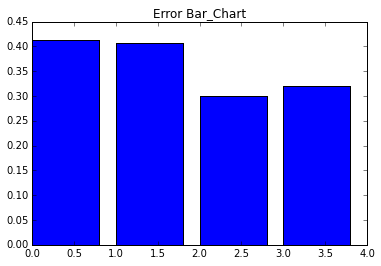

In [40]:
plotErr(e5)

In [41]:
result6,e6,cm6=layer(result5,y)
printCM(cm6)

[[8 1 2]
 [1 7 4]
 [2 5 0]]
[[6 1 1]
 [2 7 2]
 [3 5 3]]
[[9 3 1]
 [0 6 1]
 [1 5 4]]
[[7 2 2]
 [1 8 0]
 [2 5 3]]
[[4 3 0]
 [3 8 0]
 [1 4 7]]


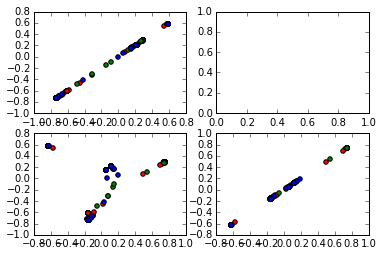

In [42]:
plotdata(result6,y)


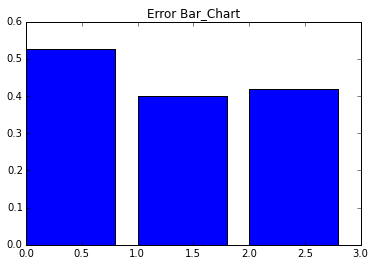

In [43]:
plotErr(e6)

In [82]:
result1_poly,errPoly1,cm=layer_poly(result,y)

In [83]:
plotdata(result1_poly,y)

In [84]:
plotErr(errPoly1)

In [85]:
result2_poly,errPoly2,cm=layer_poly(result1_poly,y)

In [86]:
plotdata(result2_poly,y)

In [87]:
plotErr(errPoly2)

In [ ]:
result3_poly,errPoly3,cm=layer_poly(result2_poly,y)

In [ ]:
plotdata(result3_poly,y)

In [ ]:
plotErr(errPoly3)

In [ ]:
result4_poly,errPoly4,cm=layer_poly(result3_poly,y)

In [ ]:
plotdata(result4_poly,y)

In [ ]:
plotErr(errPoly4)

In [ ]:
result5_poly,errPoly5,cm=layer_poly(result4_poly,y)

In [ ]:
plotdata(result5_poly,y)

In [ ]:
plotErr(errPoly5)

In [ ]:
result6_poly,errPoly6,cm=layer_poly(result5_poly,y)

In [ ]:
plotdata(result6_poly,y)

In [ ]:
plotErr(errPoly6)

In [21]:
result1_sigmoid,errSig,cm=layer_sigmoid(result,y)
print result1_sigmoid.shape[1]

2


In [22]:
plotdata(result1_sigmoid,y)

In [23]:
plotErr(errSig)

In [26]:
result1_cosine,errCos1,cm=layer_cosine(result,y)
print result1_cosine.shape

(150L, 3L)


In [27]:
plotdata(result1_cosine,y)

In [28]:
plotErr(errCos1)

In [29]:
result2_cosine,errCos2,cm=layer_cosine(result1_cosine,y)
print result1_cosine.shape

(150L, 3L)


In [30]:
plotdata(result2_cosine,y)

In [31]:
plotErr(errCos2)

In [32]:
result3_cosine,errCos3,cm=layer_cosine(result2_cosine,y)
print result1_cosine.shape

(150L, 3L)


In [33]:
plotdata(result3_cosine,y)

In [34]:
plotErr(errCos3)

In [35]:
result4_cosine,errCos4,cm=layer_cosine(result3_cosine,y)
print result1_cosine.shape

(150L, 3L)


In [36]:
plotdata(result4_cosine,y)

In [37]:
plotErr(errCos4)

In [135]:
result2_rbf,err2_rbf=layer(result1_poly,y)

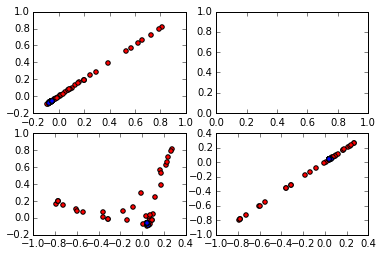

In [137]:
plotdata(result2_rbf,y)

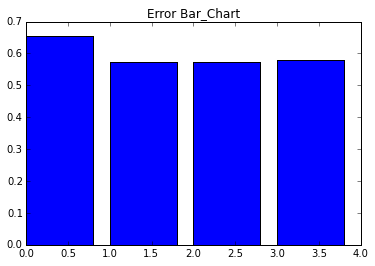

In [138]:
plotErr(err2_rbf)

In [139]:
result2_rbf2,err2_rbf2=layer(result1_sigmoid,y)

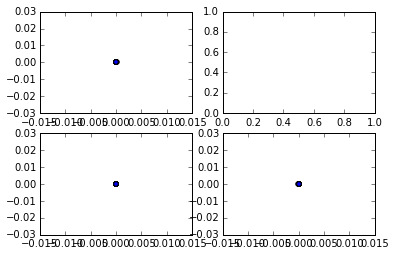

In [140]:
plotdata(result2_rbf2,y)

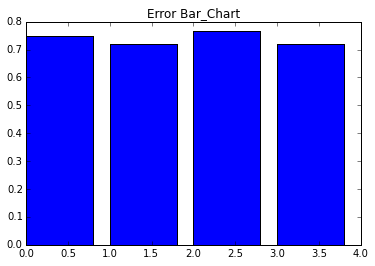

In [141]:
plotErr(err2_rbf2)

In [142]:
result2_rbf3,err2_rbf3=layer(result1_cosine,y)

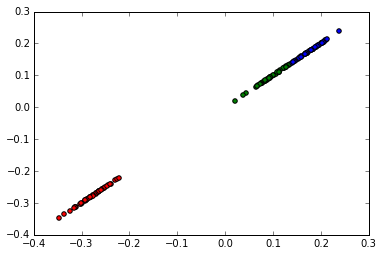

In [146]:
#plotdata(result2_rbf3,y)
for t,color in zip(xrange(3),'rgb'):
    plt.scatter(result2_rbf3[y == t],result2_rbf3[y == t],c=color)
plt.show()

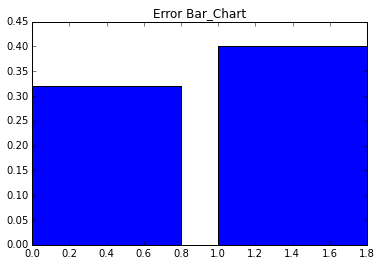

In [147]:
plotErr(err2_rbf3)